Step 1: Check GPU Availability

In [ ]:
!nvidia-smi

Step 2: Install Required Libraries

In [ ]:
!pip install ultralytics==8.0.196 roboflow

Step 3: Setup and Import Libraries

In [2]:
from IPython.display import display, Image
import glob
from roboflow import Roboflow
import os
from PIL import Image as PILImage
import json

# Initialize and Clear any previous outputs
from IPython import display
display.clear_output(wait=True)

Step 4: Setup YOLO and Roboflow

In [ ]:
import ultralytics
ultralytics.checks()
from ultralytics import YOLO

Step 5: Define Paths

In [4]:
dataset_dir = '/content/datasets'
predictions_dir = '/content/predictions'
json_output_dir = '/content/json_annotations'

os.makedirs(dataset_dir, exist_ok=True)
os.makedirs(predictions_dir, exist_ok=True)
os.makedirs(json_output_dir, exist_ok=True)

Step 6: Setup Roboflow

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="Qcpny2sVf8g33aLNl9iL")
project = rf.workspace("cos30018").project("initialmulticlass")
version = project.version(1)
dataset = version.download("yolov8")

Step 7: Train Model

In [ ]:
!yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=50 imgsz=640 plots=True

In [ ]:
!ls runs/detect/train/

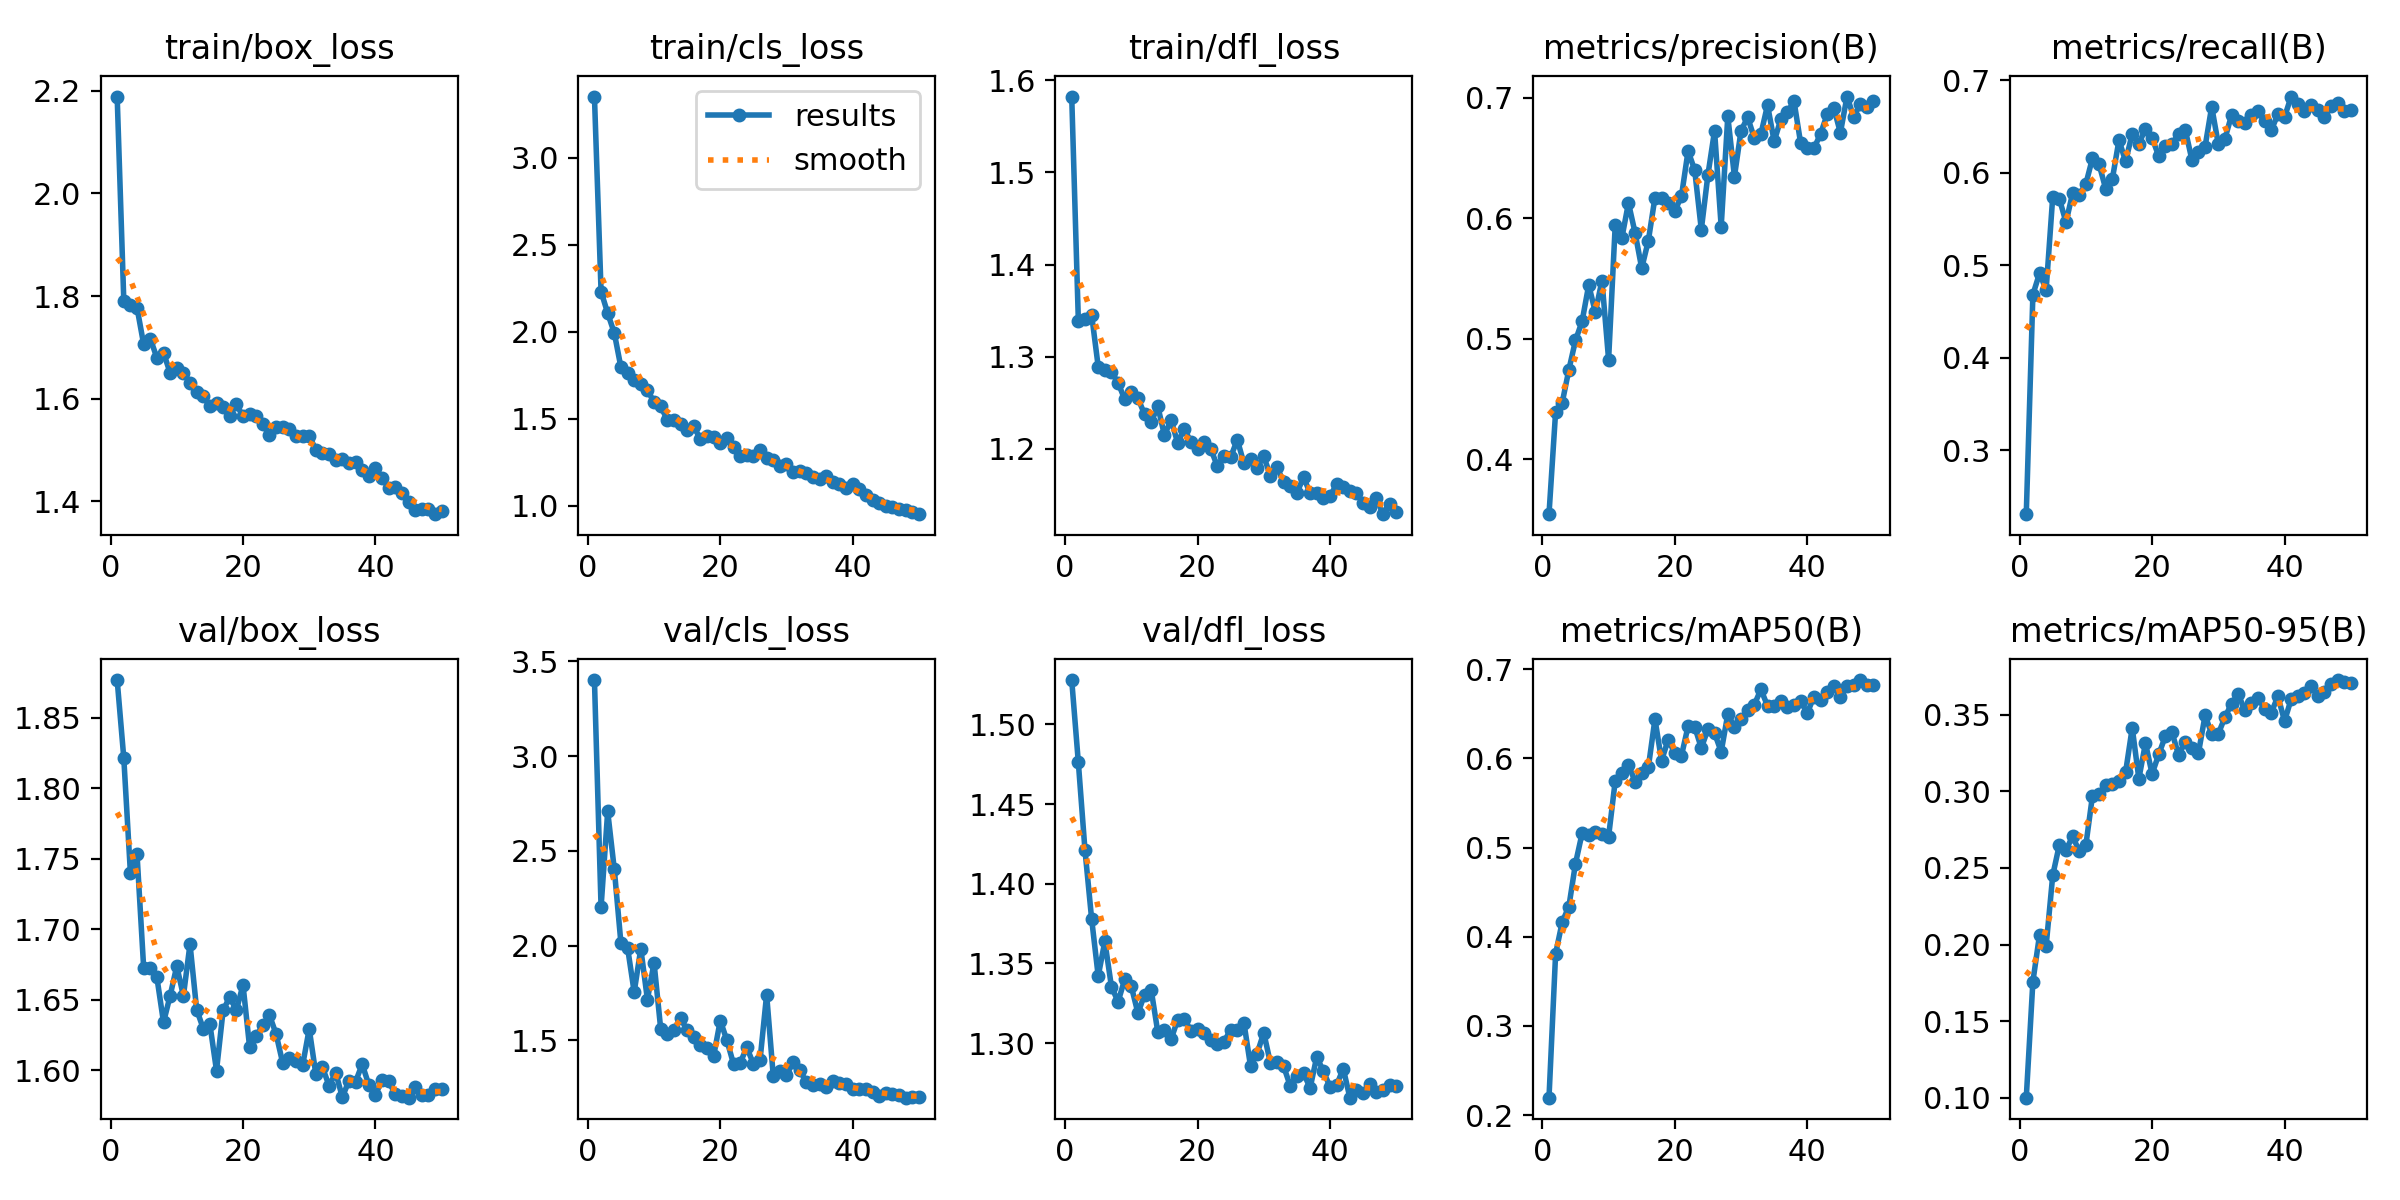

In [9]:
Image(filename='runs/detect/train/results.png', width=800)

Step 8: Predict on Training and Validation Set

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!rm -r /content/drive/MyDrive/COS30018/HILActiveLearning/*
!mkdir -p /content/drive/MyDrive/COS30018/HILActiveLearning
!cp -r /content/runs/detect/train /content/drive/MyDrive/COS30018/HILActiveLearning/

In [ ]:
!rm -r runs/detect/predict

model = YOLO('/content/drive/MyDrive/COS30018/HILActiveLearning/train/weights/best.pt')
source = dataset.location + '/train/images'
model.predict(source=source, conf=0.5, save_txt=True)

!ls runs/detect/predict/labels
!cp -r /content/runs/detect/predict/labels /content/drive/MyDrive/COS30018/HILActiveLearning/TrainLabels

In [ ]:
!rm -r runs/detect/predict

model = YOLO('/content/drive/MyDrive/COS30018/HILActiveLearning/train/weights/best.pt')
source = dataset.location + '/valid/images'
model.predict(source=source, conf=0.5, save_txt=True)

!ls runs/detect/predict/labels
!cp -r /content/runs/detect/predict/labels /content/drive/MyDrive/COS30018/HILActiveLearning/TrainLabels